In [1]:
import os

print(os.getcwd())

os.environ['HF_HOME'] = '/kaggle/working/HF_cache'

for k in os.environ:
    print(k)

/kaggle/working
SHELL
NV_LIBCUBLAS_VERSION
NVIDIA_VISIBLE_DEVICES
NV_NVML_DEV_VERSION
NV_CUDNN_PACKAGE_NAME
NV_LIBNCCL_DEV_PACKAGE
NV_LIBNCCL_DEV_PACKAGE_VERSION
CUDA_MINOR_VERSION
VM_GCE_METADATA_HOST
HOSTNAME
LANGUAGE
KAGGLE_DATA_PROXY_TOKEN
COLAB_TPU_1VM
NVIDIA_REQUIRE_CUDA
NV_LIBCUBLAS_DEV_PACKAGE
NV_NVTX_VERSION
TF_CPP_MIN_LOG_LEVEL
COLAB_JUPYTER_IP
NV_CUDA_CUDART_DEV_VERSION
NV_LIBCUSPARSE_VERSION
KAGGLE_URL_BASE
NV_LIBNPP_VERSION
NCCL_VERSION
KAGGLE_DOCKER_IMAGE
KAGGLE_KERNEL_INTEGRATIONS
KMP_LISTEN_PORT
TF_FORCE_GPU_ALLOW_GROWTH
COLAB_HUMAN_READABLE_NODE_LOGS
ENV
PWD
TESSERACT_PATH
NV_CUDNN_PACKAGE
NVIDIA_DRIVER_CAPABILITIES
LAST_FORCED_REBUILD
NV_NVPROF_DEV_PACKAGE
NV_LIBNPP_PACKAGE
BUILD_DATE
NV_LIBNCCL_DEV_PACKAGE_NAME
TCLLIBPATH
NV_LIBCUBLAS_DEV_VERSION
NVIDIA_PRODUCT_NAME
NV_LIBCUBLAS_DEV_PACKAGE_NAME
NV_CUDA_CUDART_VERSION
COLAB_JUPYTER_ALLOW_ORIGIN_PAT
COLAB_WARMUP_DEFAULTS
HOME
LANG
COLUMNS
CUDA_VERSION
CLOUDSDK_CONFIG
NV_LIBCUBLAS_PACKAGE
NV_CUDA_NSIGHT_COMPUTE_DEV_PAC

In [2]:
!pip install -U -q byaldi pdf2image qwen-vl-utils transformers

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 12.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 87.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 48.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 kB 13.2 MB/s eta 0:00:00


In [3]:
!sudo apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpoppler-dev libpoppler-private-dev libpoppler118
The following NEW packages will be installed:
  poppler-utils
The following packages will be upgraded:
  libpoppler-dev libpoppler-private-dev libpoppler118
3 upgraded, 1 newly installed, 0 to remove and 126 not upgraded.
Need to get 1,462 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpoppler-private-dev amd64 22.02.0-2ubuntu0.6 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpoppler-dev amd64 22.02.0-2ubuntu0.6 [5,184 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpoppler118 amd64 22.02.0-2ubuntu0.6 [1,071 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 1,4

In [4]:
import os
from pdf2image import convert_from_path


def convert_pdfs_to_images(pdf_folder):
    pdf_files = [f for f in os.listdir(pdf_folder) if f.endswith(".pdf")]
    all_images = {}

    for doc_id, pdf_file in enumerate(pdf_files):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        images = convert_from_path(pdf_path)
        all_images[doc_id] = images

    return all_images


all_images = convert_pdfs_to_images("/kaggle/input/manual-demo")

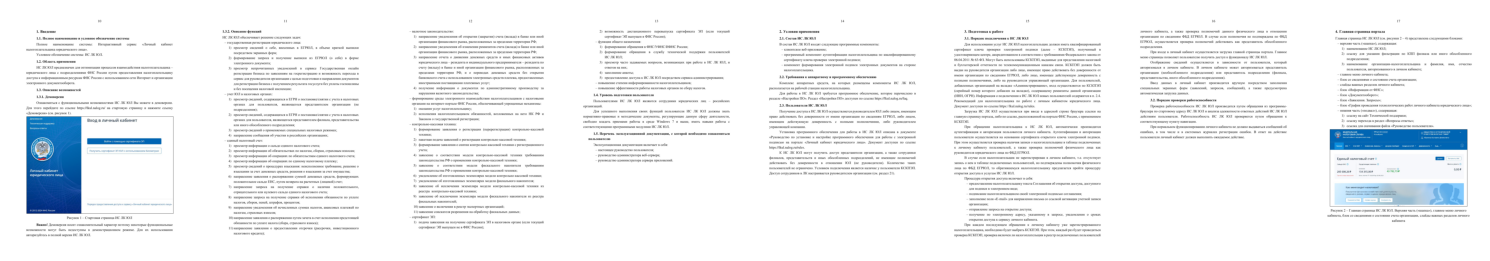

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 8, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    img = all_images[0][i]
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [6]:
from byaldi import RAGMultiModalModel

docs_retrieval_model = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2")

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

In [8]:
from time import time

start = time()
"""
docs_retrieval_model.index(
    input_path="data/", index_name="image_index", store_collection_with_index=False, overwrite=True
)
"""
docs_retrieval_model.index(
    input_path="/kaggle/input/manual-demo", index_name="image_index", store_collection_with_index=False, overwrite=True
)

print(f'{time() - start} seconds to index images')

Indexing file: /kaggle/input/manual-demo/manual_subset.pdf
Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Added page 21 of document 0 to index.
Added page 22 of document 0 to index.
Added page 23 of document 0 to index.
Added page 24 of document 0 to index.
Added page 25 of document 0 to index.


In [9]:
#text_query = "How many people are needed to assemble the Malm?"
text_query = "Где отображается состояние единого налогового счета?"

results = docs_retrieval_model.search(text_query, k=1)
results

[{'doc_id': 0, 'page_num': 19, 'score': 12.625, 'metadata': {}, 'base64': None},
 {'doc_id': 0, 'page_num': 15, 'score': 12.125, 'metadata': {}, 'base64': None},
 {'doc_id': 0, 'page_num': 2, 'score': 12.0, 'metadata': {}, 'base64': None}]

In [10]:
def get_grouped_images(results, all_images):
    grouped_images = []

    for result in results:
        doc_id = result["doc_id"]
        page_num = result["page_num"]
        grouped_images.append(
            all_images[doc_id][page_num - 1]
        )  # page_num are 1-indexed, while doc_ids are 0-indexed. Source https://github.com/AnswerDotAI/byaldi?tab=readme-ov-file#searching

    return grouped_images


grouped_images = get_grouped_images(results, all_images)

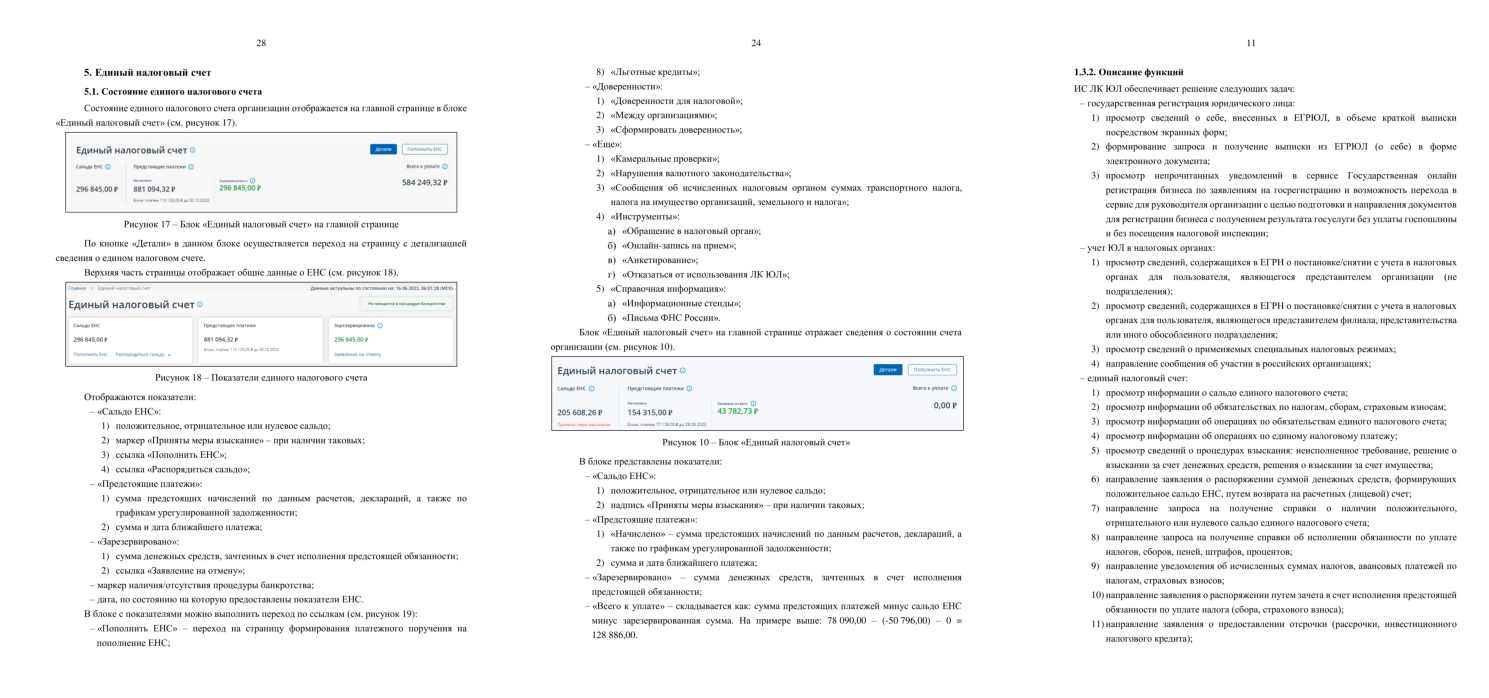

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    img = grouped_images[i]
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [12]:
from transformers import Qwen2VLForConditionalGeneration, Qwen2VLProcessor
from qwen_vl_utils import process_vision_info
import torch

vl_model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct",
    torch_dtype=torch.bfloat16,
    device_map="cuda:1",
)
#vl_model.cuda().eval()

config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/429M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

In [13]:
min_pixels = 224 * 224
#max_pixels = 1024 * 1024
max_pixels = 512 * 512
vl_model_processor = Qwen2VLProcessor.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels
)

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [14]:
chat_template = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": grouped_images[0],
            },
            {
                "type": "image",
                "image": grouped_images[1],
            },
            {
                "type": "image",
                "image": grouped_images[2],
            },
            {"type": "text", "text": text_query},
        ],
    }
]

In [15]:
text = vl_model_processor.apply_chat_template(chat_template, tokenize=False, add_generation_prompt=True)

In [16]:
image_inputs, _ = process_vision_info(chat_template)
inputs = vl_model_processor(
    text=[text],
    images=image_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda:1")

In [17]:
generated_ids = vl_model.generate(**inputs, max_new_tokens=500)

In [18]:
generated_ids_trimmed = [out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)]
output_text = vl_model_processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

In [19]:
print(output_text[0])

В блоке «Единый налоговый счет» на главной странице отображается общие данные о ЕНС (см. рисунок 18).


In [ ]:
def answer_with_multimodal_rag(
    vl_model, docs_retrieval_model, vl_model_processor, grouped_images, text_query, top_k, max_new_tokens
):
    results = docs_retrieval_model.search(text_query, k=top_k)
    grouped_images = get_grouped_images(results, all_images)

    chat_template = [
        {
            "role": "user",
            "content": [{"type": "image", "image": image} for image in grouped_images]
            + [{"type": "text", "text": text_query}],
        }
    ]

    # Prepare the inputs
    text = vl_model_processor.apply_chat_template(chat_template, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(chat_template)
    inputs = vl_model_processor(
        text=[text],
        images=image_inputs,
        padding=True,
        return_tensors="pt",
    )
    inputs = inputs.to("cuda:1")

    # Generate text from the vl_model
    generated_ids = vl_model.generate(**inputs, max_new_tokens=max_new_tokens)
    generated_ids_trimmed = [out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)]

    # Decode the generated text
    output_text = vl_model_processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )

    return output_text

In [ ]:
output_text = answer_with_multimodal_rag(
    vl_model=vl_model,
    docs_retrieval_model=docs_retrieval_model,
    vl_model_processor=vl_model_processor,
    grouped_images=grouped_images,
    text_query="How do I assemble the Micke desk?",
    top_k=3,
    max_new_tokens=500,
)

print(output_text[0])

Datasets exploartion

In [1]:
from datasets import load_dataset

dataset = load_dataset("ymyang/chart-mrag")

print('Total questions: ', len(dataset['train']))

sample = dataset['train'][0]

question = sample['query']
answer = sample['gt_answer']
chart = sample['gt_chart']  # Image data

README.md:   0%|          | 0.00/4.70k [00:00<?, ?B/s]

data-00000-of-00001.arrow:   0%|          | 0.00/143M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4738 [00:00<?, ? examples/s]

Total questions:  4738


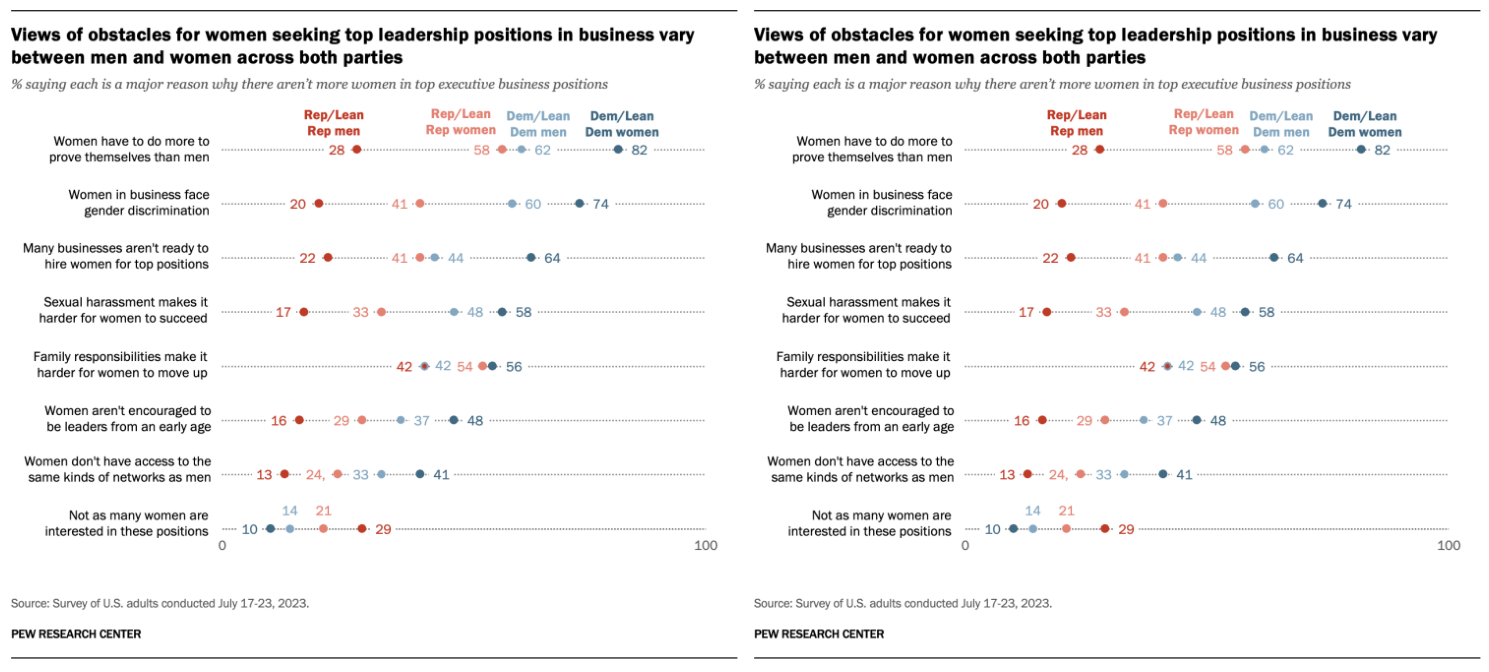

What percentage of Republicans and Republican-leaning men agree that women need to prove themselves more than men is the main reason why women are underrepresented in top management positions? And what percentage of Republicans overall agree that women need to prove themselves more than men is the main reason why women are underrepresented in top management positions?
Among those who believe that women need to work harder than men to prove themselves is the main reason why women are underrepresented in top management positions, 28% of Republican and Republican-leaning men, compared with 42% of Republicans overall, said that women need to work harder than men to prove themselves is the main reason why women are underrepresented in top management positions.


In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(chart)
    ax.axis("off")

plt.tight_layout()
plt.show()

print('question: ', question)
print('answer: ', answer)


GraphRag